### 비트 코인 가격 예측
https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

# 밀리초로 나타나있는 데이터를 초단위로 변경 한 다음 날짜형태로 바꾸는 함수
def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [5]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [6]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


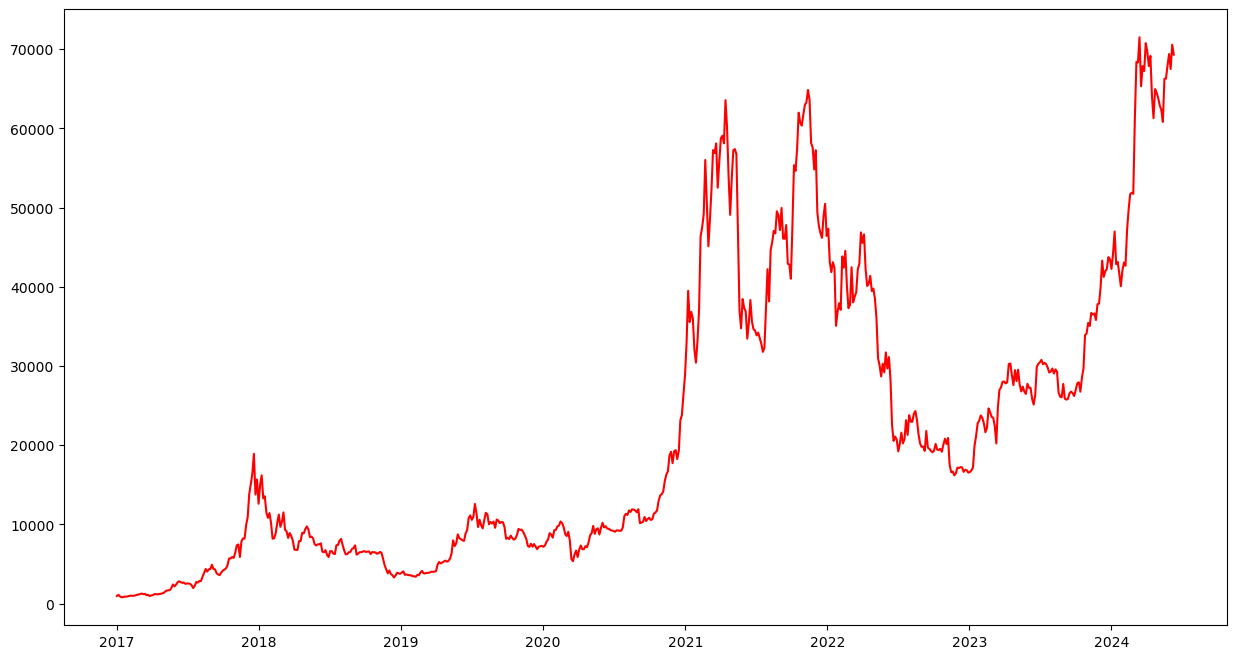

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df['2017-01-01':], c='red')
plt.show()

In [5]:
pre_b_df = bitcoin_df.dropna()
pre_b_df = pre_b_df['2017-01-01':]
pre_b_df

,y
x,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [11]:
y_train = pre_b_df['y'][:int(0.8 * len(pre_b_df))]
y_test = pre_b_df['y'][int(0.8 * len(pre_b_df)):]

<Axes: xlabel='x'>

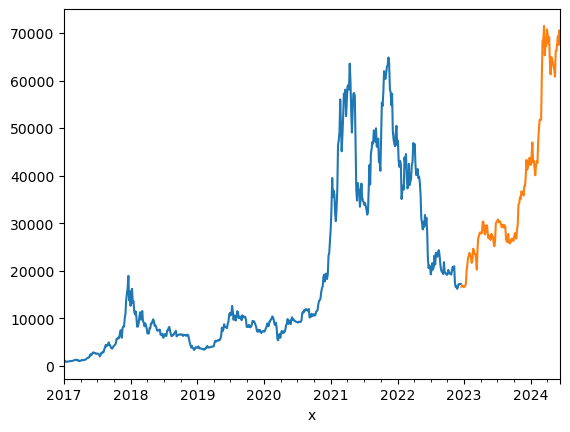

In [12]:
y_train.plot()
y_test.plot()

In [13]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)
print(f'd = {n_diffs}')

d = 1


In [14]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9728.517, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9726.582, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9726.546, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9726.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9728.545, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9728.592, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9730.550, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9724.663, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9726.662, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9726.709, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9724.698, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9728.605, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.364 seconds


In [15]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량 (잔차의 분산이 일정한지 검사)
# 영가설: 잔차가 이분산성을 띄지 않는다.
# 0.05 이상 : 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())
# summary 확인
# Prob(Q): 0.99 - 서로 독립적이고 동일한 분포를 따른다.
# Prob(H): 0.00 - 잔차의 분산이 일정하지 않다
# Prob(JB): 0.00 - 일정한 평균과 분산을 따르지 않는다.
# Skew : -0.33 - 비교적 0에 가깝다.
# Kurtosis : 9.44 - 3에 가깝지 않다. 극단적인 값(이상치)가 많다는 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4860.331
Date:                Wed, 12 Jun 2024   AIC                           9724.663
Time:                        11:32:46   BIC                           9733.257
Sample:                    01-01-2017   HQIC                          9728.023
                         - 12-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0862      0.022      3.865      0.000       0.042       0.130
sigma2       3.51e+06   1.07e+05     32.672      0.000     3.3e+06    3.72e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

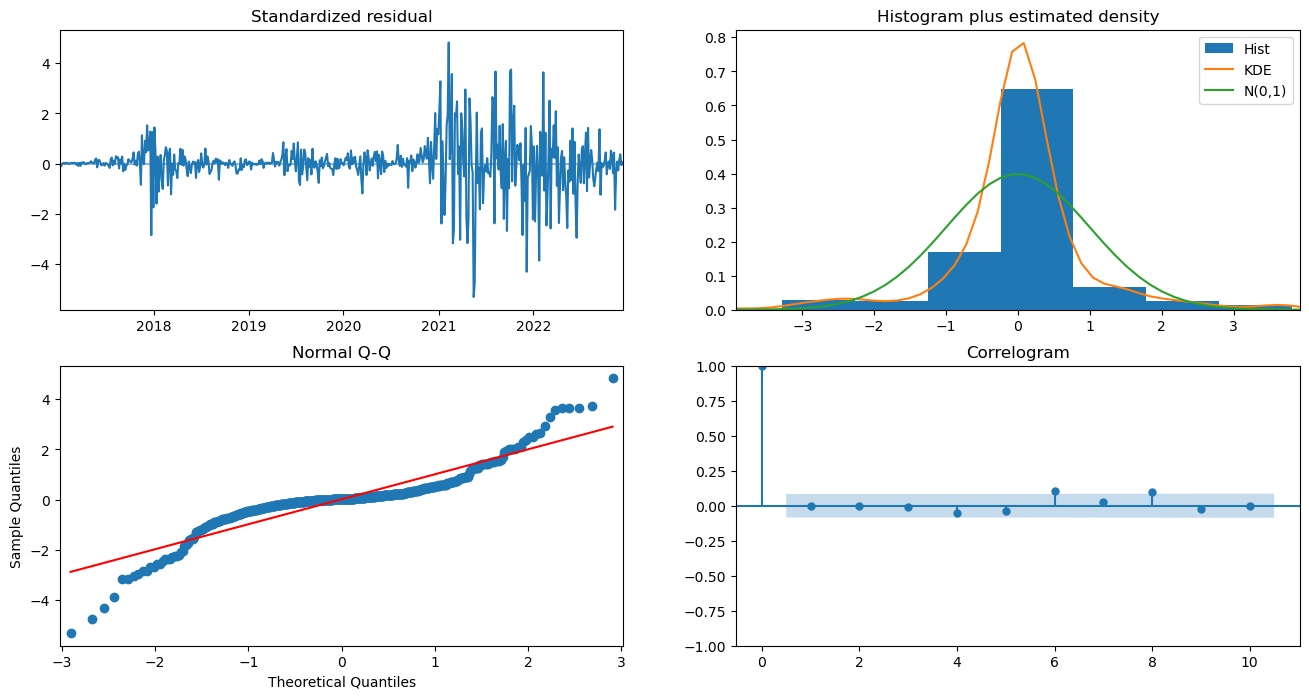

In [18]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [19]:
prediction = model.predict(n_periods=len(y_test))
prediction

2022-12-17    17203.541131
2022-12-21    17203.541131
2022-12-25    17203.541131
2022-12-29    17203.541131
2023-01-02    17203.541131
                  ...     
2024-05-24    17203.541131
2024-05-28    17203.541131
2024-06-01    17203.541131
2024-06-05    17203.541131
2024-06-09    17203.541131
Freq: 4D, Length: 136, dtype: float64

In [20]:
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int)
print(prediction)

[[13531.3330262  20875.74923639]]
2022-12-17    17203.541131
Freq: 4D, dtype: float64


In [21]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    
    return prediction.tolist()[0]

In [22]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

In [23]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
x,,
2022-12-17,16637.60,17203.541131
2022-12-21,16904.64,16588.820530
2022-12-25,16838.10,16931.825475
2022-12-29,16539.28,16830.033169
2023-01-02,16613.71,16514.245985
...,...,...
2024-05-24,67942.23,66234.722994
2024-05-28,69374.17,68073.747880
2024-06-01,67484.93,69475.407048


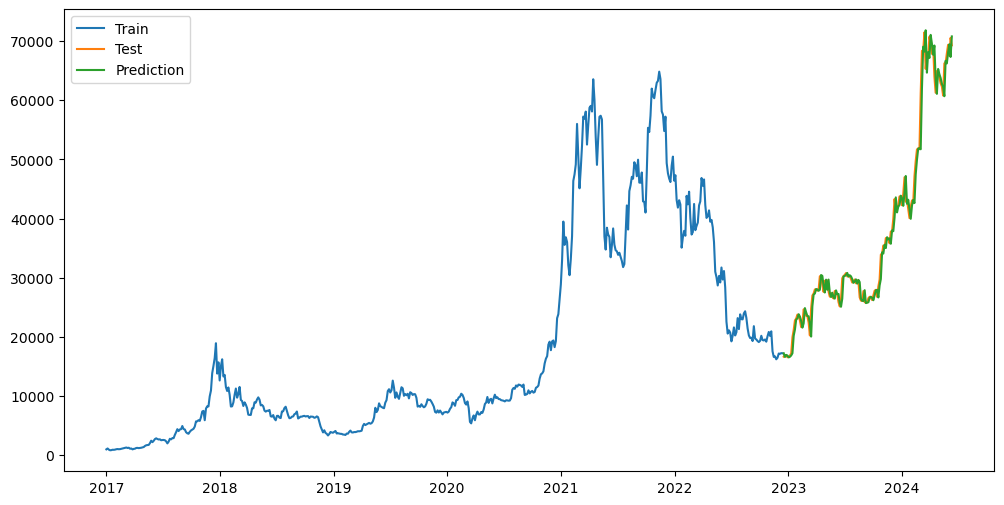

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

#### MAPE (Mean Absolute Percentage Error)
- 예측 모델의 정확성을 평가하는 지표로, 예측값이 실제값과 얼마나 차이나는지를 백분율로 나타냄.
- MAPE가 낮을수록 모델의 예측 성능이 좋음

In [25]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 3.5465


예측값과 실제값이 평균적으로 3.5% 정도 차이가 난다.

### Prophet
- 딥러닝으로 예측

In [8]:
pre_b_df = bitcoin_df['2022-01-01':]
pre_b_df

,y
x,
2022-01-03,47327.87
2022-01-07,43120.63
2022-01-11,41849.00
2022-01-15,43099.37
2022-01-19,42381.48
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [9]:
pre_b_df

,y
x,
2022-01-03,47327.87
2022-01-07,43120.63
2022-01-11,41849.00
2022-01-15,43099.37
2022-01-19,42381.48
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [10]:
pre_b_df = pre_b_df.reset_index(drop=False)
pre_b_df

,x,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [11]:
pre_b_df = pre_b_df.rename(columns={'x': 'ds'})
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [13]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
   ---------------------------------------- 0.1/13.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.2/13.3 MB 1.5 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/13.3 MB 1.4 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/13.3 MB 1.3 MB/s eta 0:00:10
   -- 

In [14]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

08:55:25 - cmdstanpy - INFO - Chain [1] start processing
08:55:26 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']][600:]

,ds,yhat,yhat_lower,yhat_upper


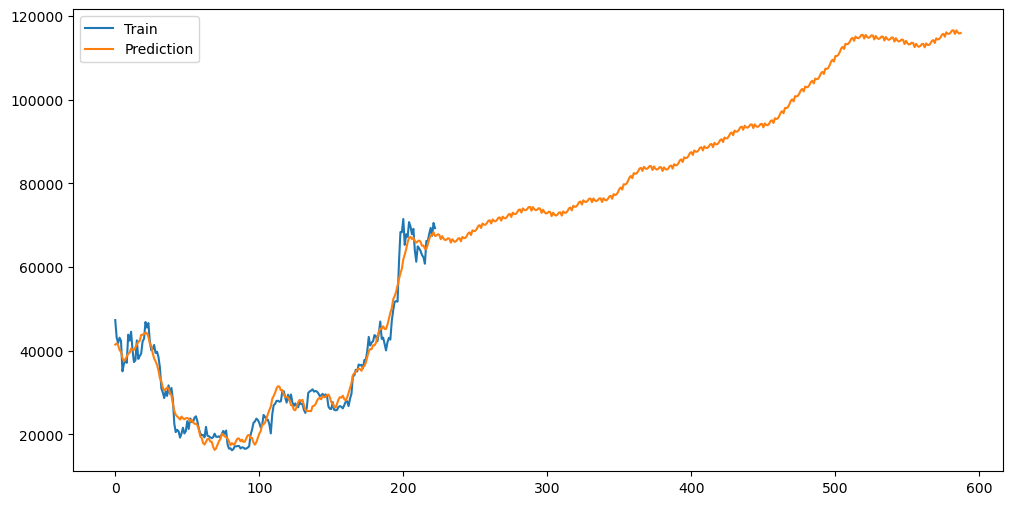

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_b_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


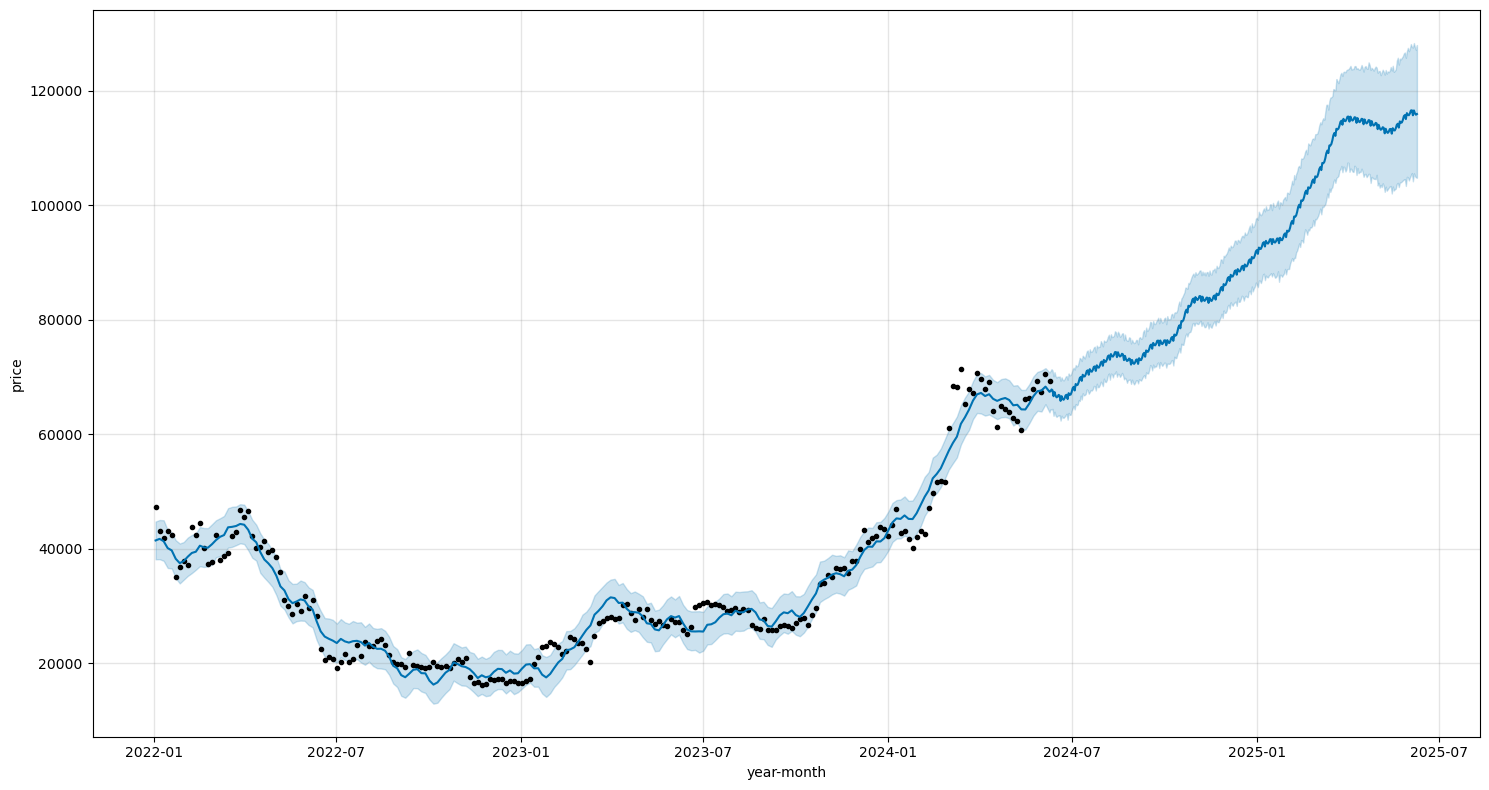

In [18]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

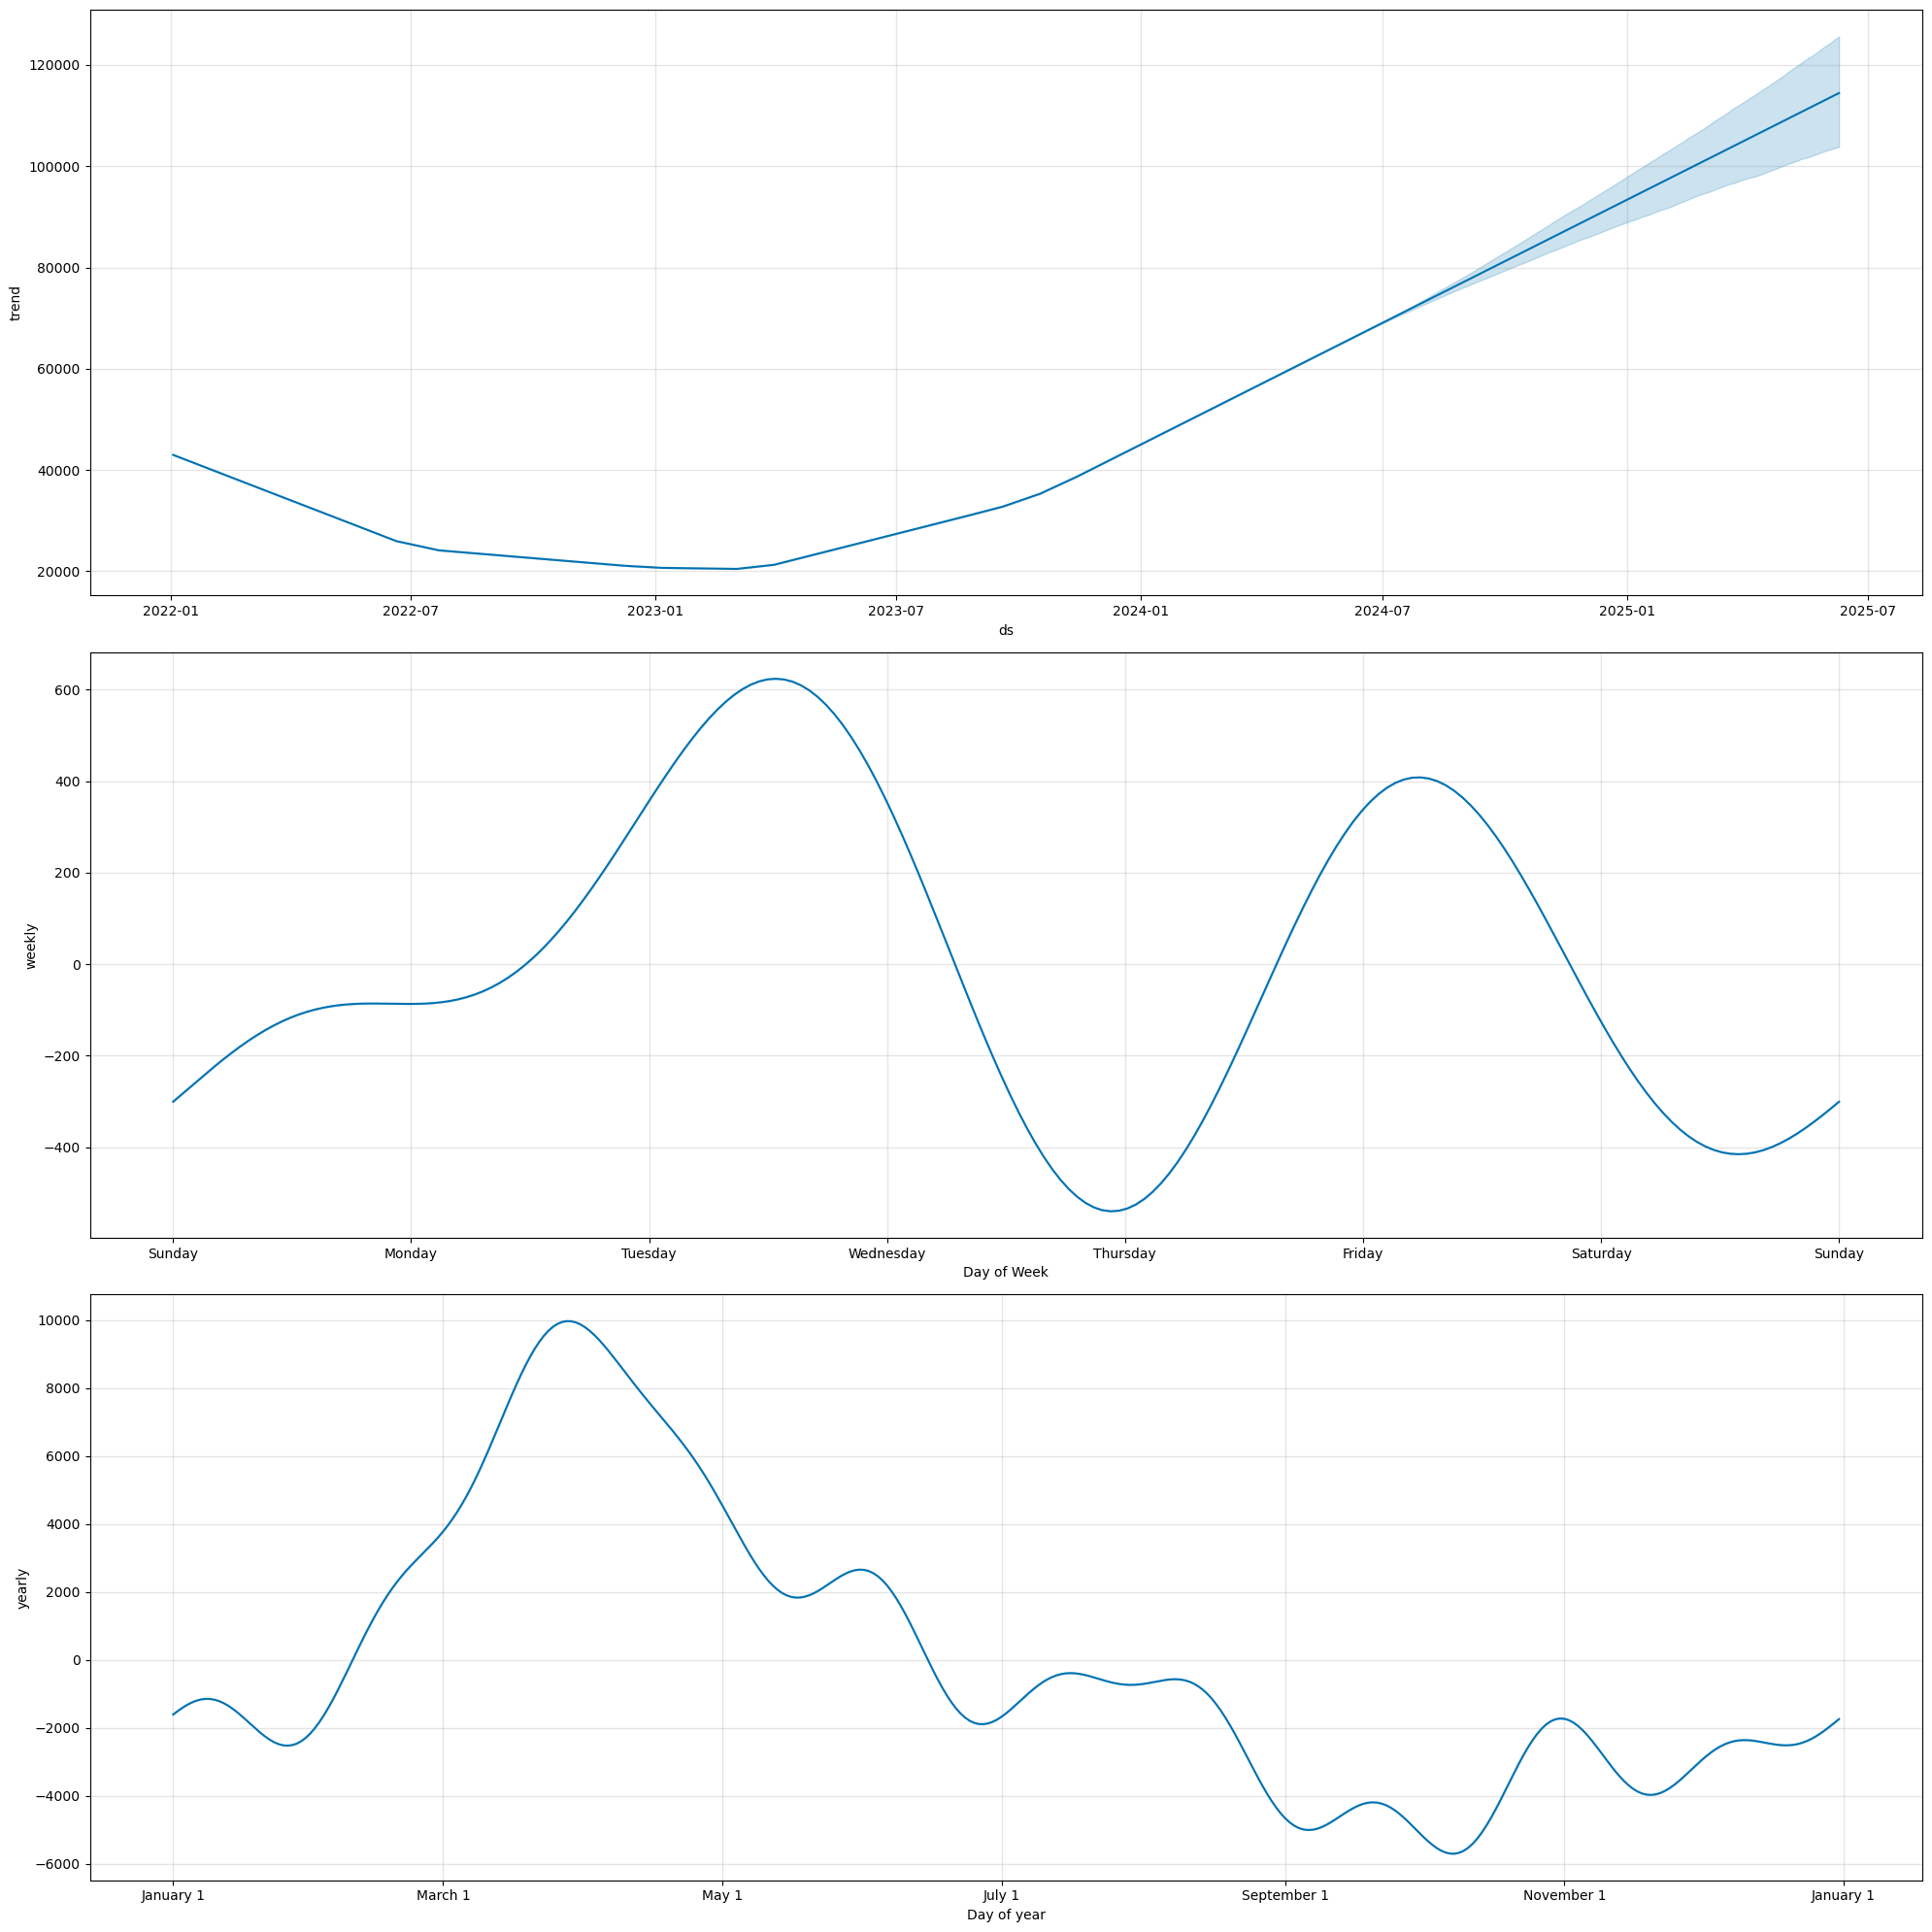

In [19]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### Prophet 심화

In [20]:
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [21]:
train_df = pre_b_df.iloc[:int(len(pre_b_df) * 0.8)]
train_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
173,2023-11-26,37800.94
174,2023-11-30,37867.37
175,2023-12-04,39976.04
176,2023-12-08,43298.70


In [24]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale : trend의 변화하는 크기를 반영하는 정도이다. 0.06가 default
# seasonality_prior_scale : 계절성을 반영하는 단위이다.
# seasonality_mode : 계절성으로 나타나는 효과를 더해 나갈지, 곱해나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성

param_combined = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_b_df) * 0.8)
test_len = int(len(pre_b_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_b_df.iloc[: train_len]
test_df = pre_b_df.iloc[train_len: ]

mapes = []
for param in param_combined:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combined)
tuning_result['mape'] = mapes

09:06:51 - cmdstanpy - INFO - Chain [1] start processing
09:06:51 - cmdstanpy - INFO - Chain [1] done processing
09:06:53 - cmdstanpy - INFO - Chain [1] start processing
09:06:53 - cmdstanpy - INFO - Chain [1] done processing
09:06:55 - cmdstanpy - INFO - Chain [1] start processing
09:06:55 - cmdstanpy - INFO - Chain [1] done processing
09:06:58 - cmdstanpy - INFO - Chain [1] start processing
09:06:58 - cmdstanpy - INFO - Chain [1] done processing
09:07:00 - cmdstanpy - INFO - Chain [1] start processing
09:07:00 - cmdstanpy - INFO - Chain [1] done processing
09:07:02 - cmdstanpy - INFO - Chain [1] start processing
09:07:02 - cmdstanpy - INFO - Chain [1] done processing
09:07:05 - cmdstanpy - INFO - Chain [1] start processing
09:07:05 - cmdstanpy - INFO - Chain [1] done processing
09:07:07 - cmdstanpy - INFO - Chain [1] start processing
09:07:07 - cmdstanpy - INFO - Chain [1] done processing
09:07:09 - cmdstanpy - INFO - Chain [1] start processing
09:07:09 - cmdstanpy - INFO - Chain [1]

In [25]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
19,0.50,0.10,multiplicative,0.143376
17,0.50,0.05,multiplicative,0.143557
21,0.50,1.00,multiplicative,0.143878
23,0.50,10.00,multiplicative,0.143935
18,0.50,0.10,additive,0.144873
33,5.00,0.05,multiplicative,0.144967
41,10.00,0.05,multiplicative,0.145168
35,5.00,0.10,multiplicative,0.145253
39,5.00,10.00,multiplicative,0.145380
43,10.00,0.10,multiplicative,0.145405


In [26]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='multiplicative')

model.fit(pre_b_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

09:09:40 - cmdstanpy - INFO - Chain [1] start processing
09:09:40 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2024-06-05,70045.865297,67519.627810,72478.801284
222,2024-06-09,67502.869742,64806.575448,69908.959873
223,2024-06-10,67602.329721,65203.869143,70179.479347
224,2024-06-11,69008.227334,66594.971591,71526.216288
225,2024-06-12,68681.306292,66223.238188,71087.008444
...,...,...,...,...
583,2025-06-05,125823.856555,65448.745578,182303.403909
584,2025-06-06,129113.355299,66855.771515,186951.803353
585,2025-06-07,127408.280463,65874.114982,183690.507695
586,2025-06-08,125298.219561,64028.901555,181752.840021


In [27]:
b_df = pre_b_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

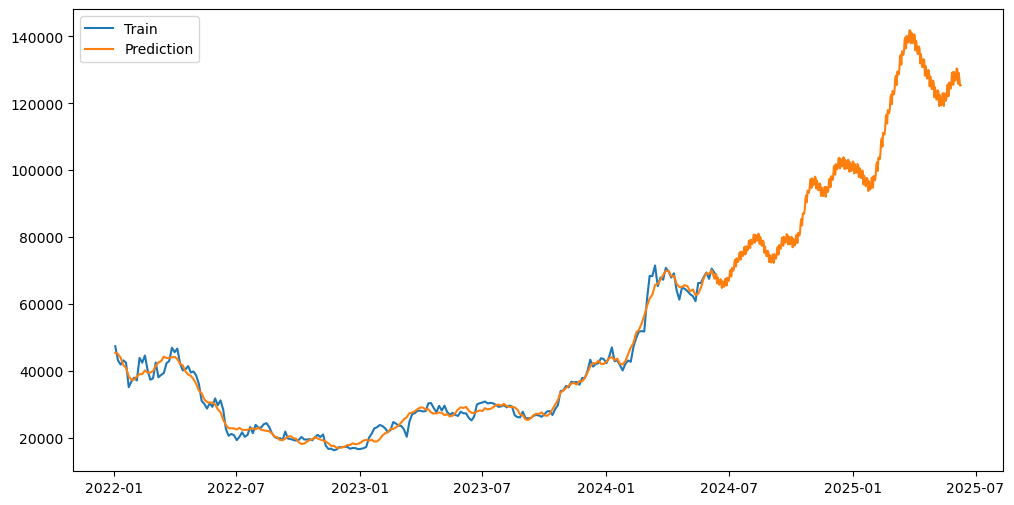

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


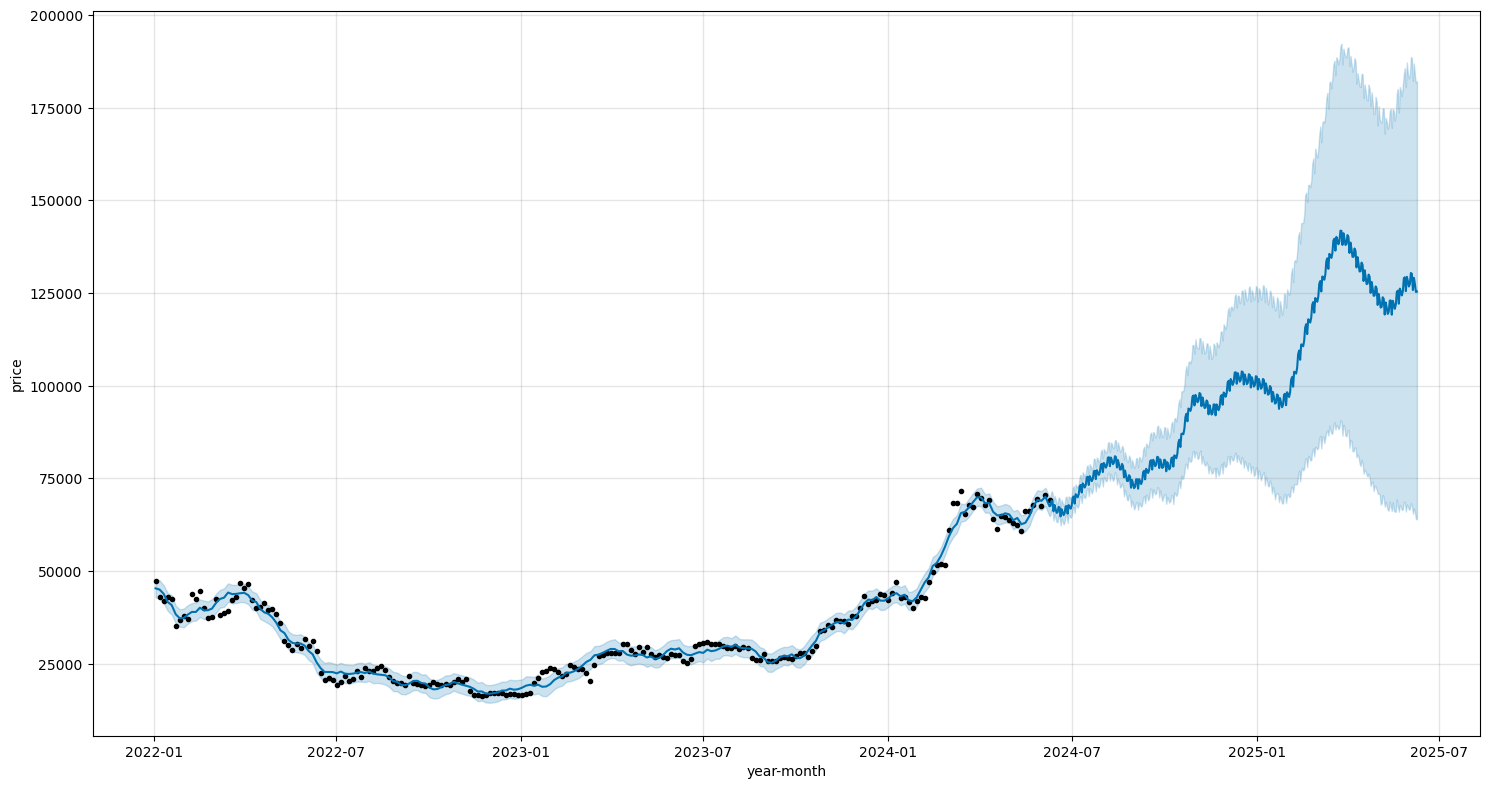

In [29]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

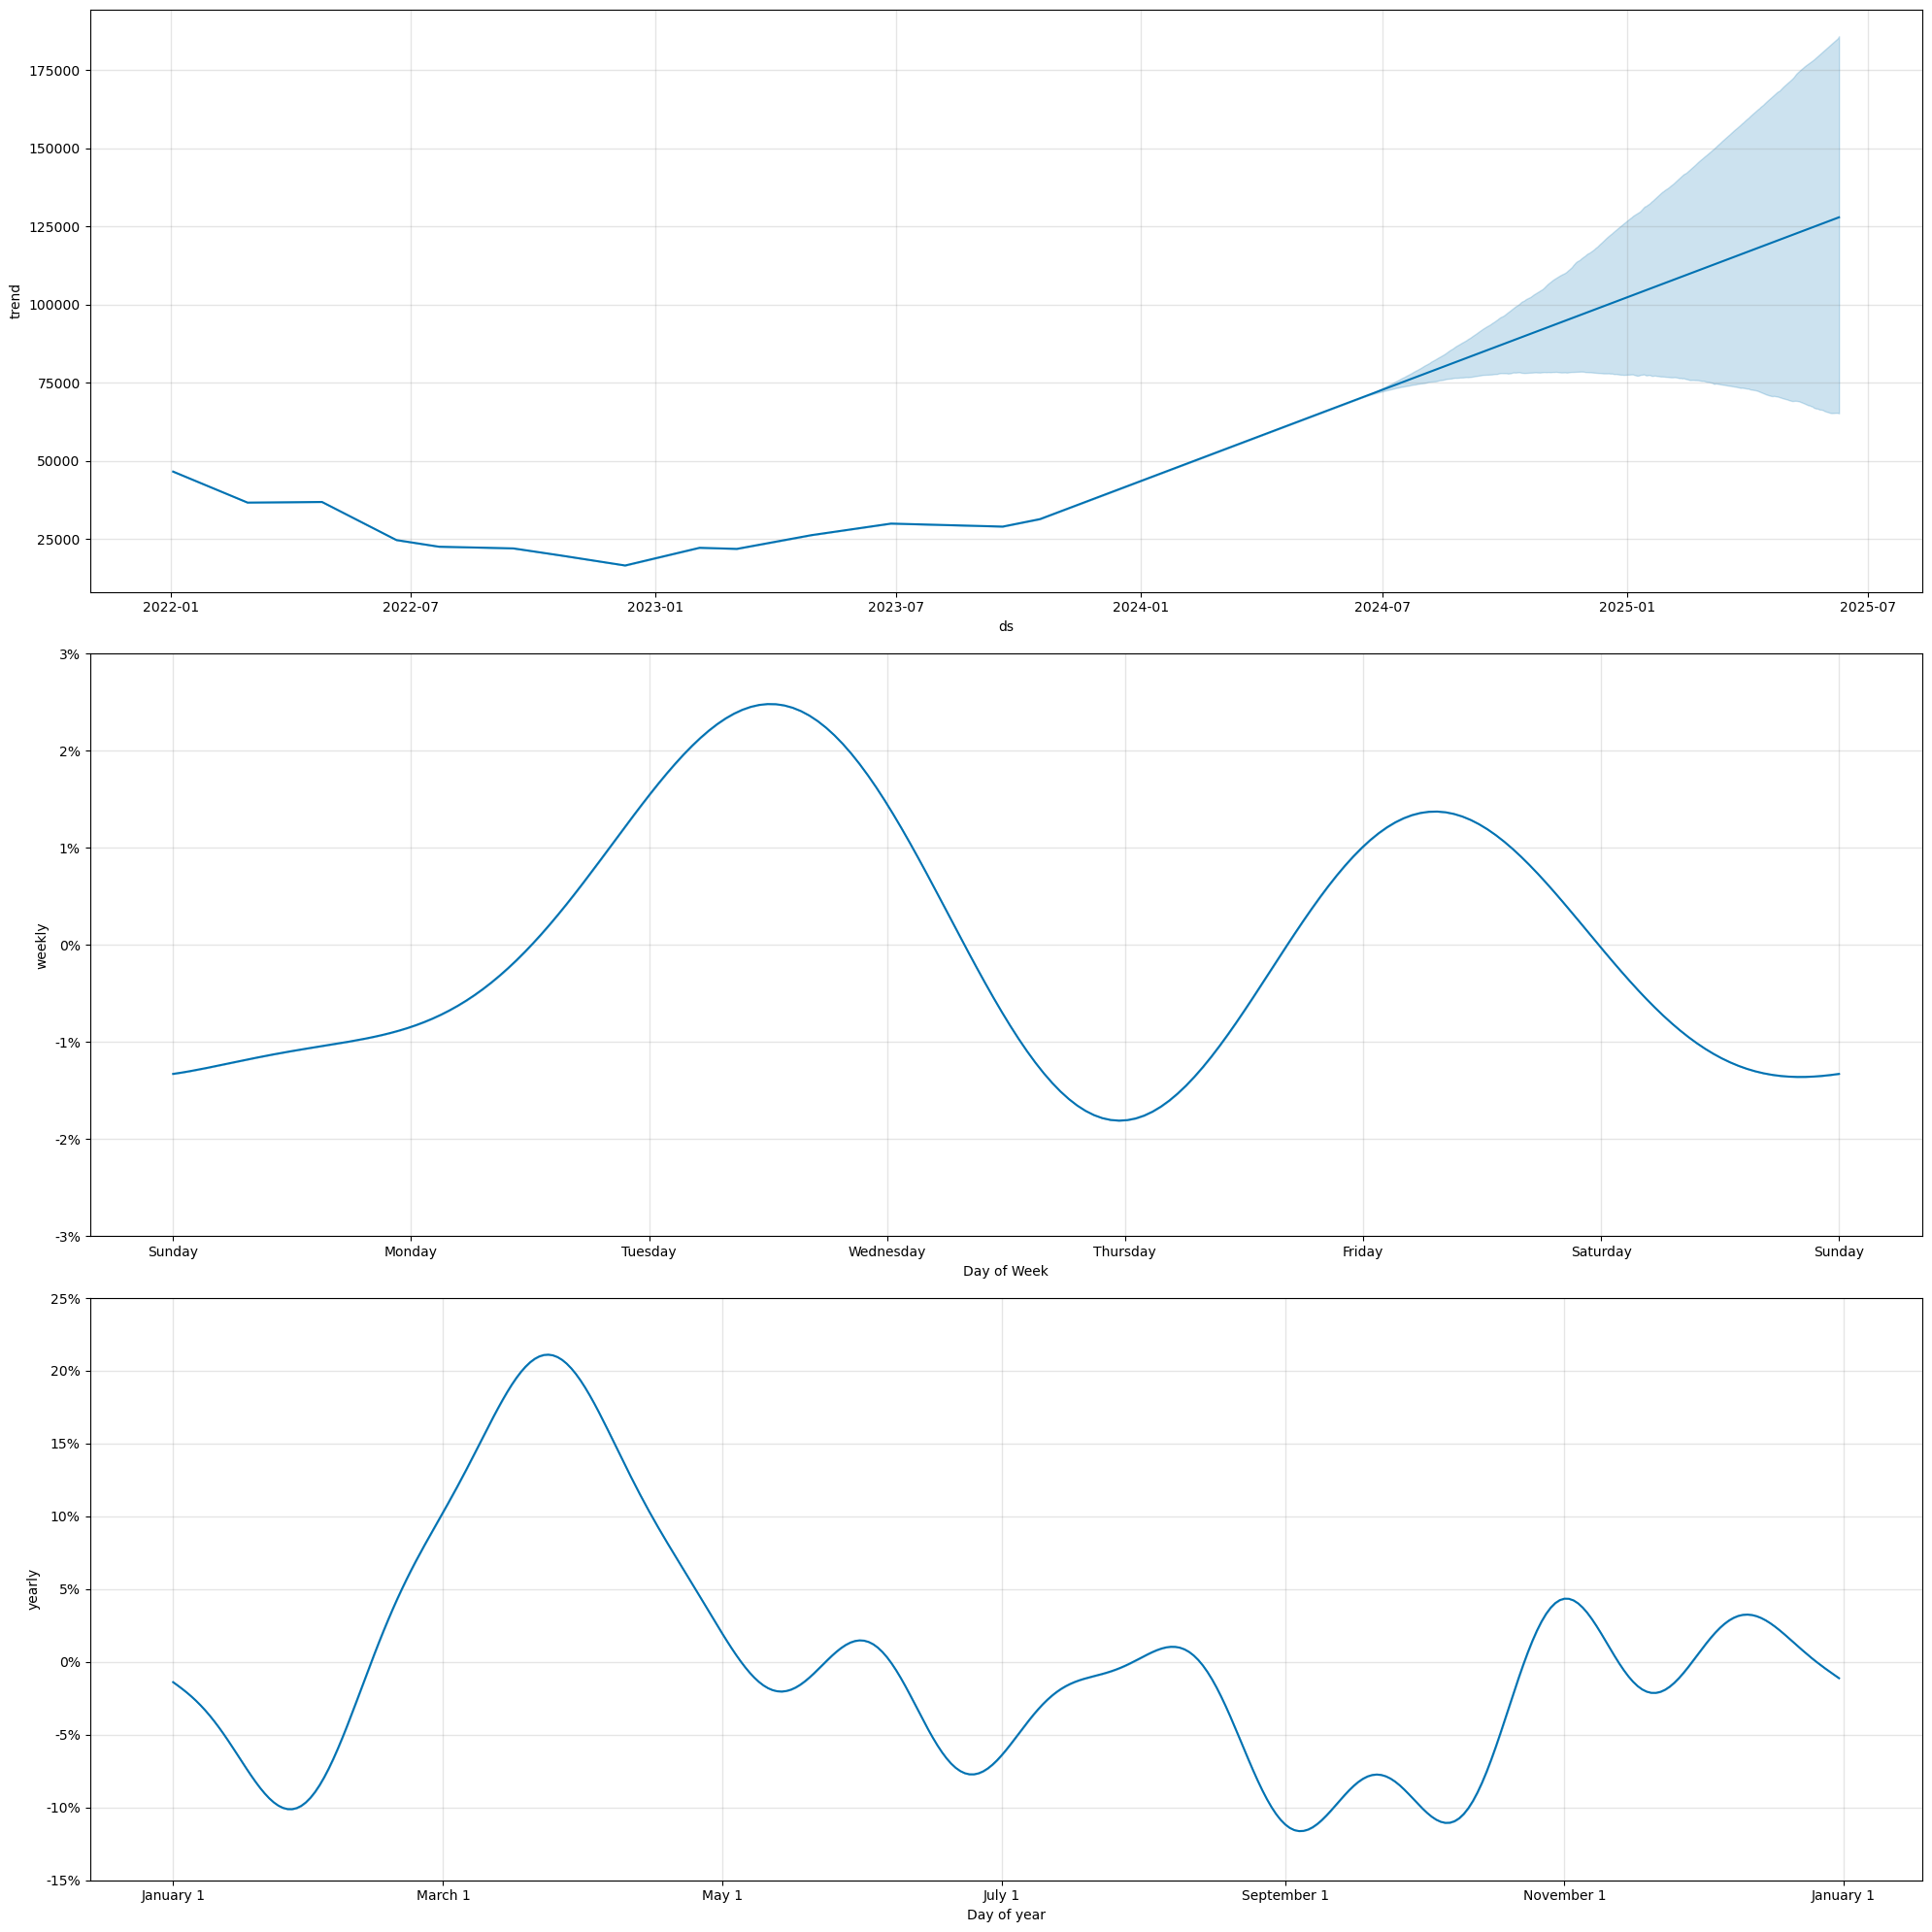

In [30]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()